In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 파일 경로 설정
file_path = '~/data/data/bike-sharing-demand/train.csv'
train = pd.read_csv(file_path)

In [36]:
print(train.head())  # 상위 5개 데이터 출력
print(train.info())  # 데이터 타입 및 요약 정보

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

In [37]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [38]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
#datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
print(train.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     

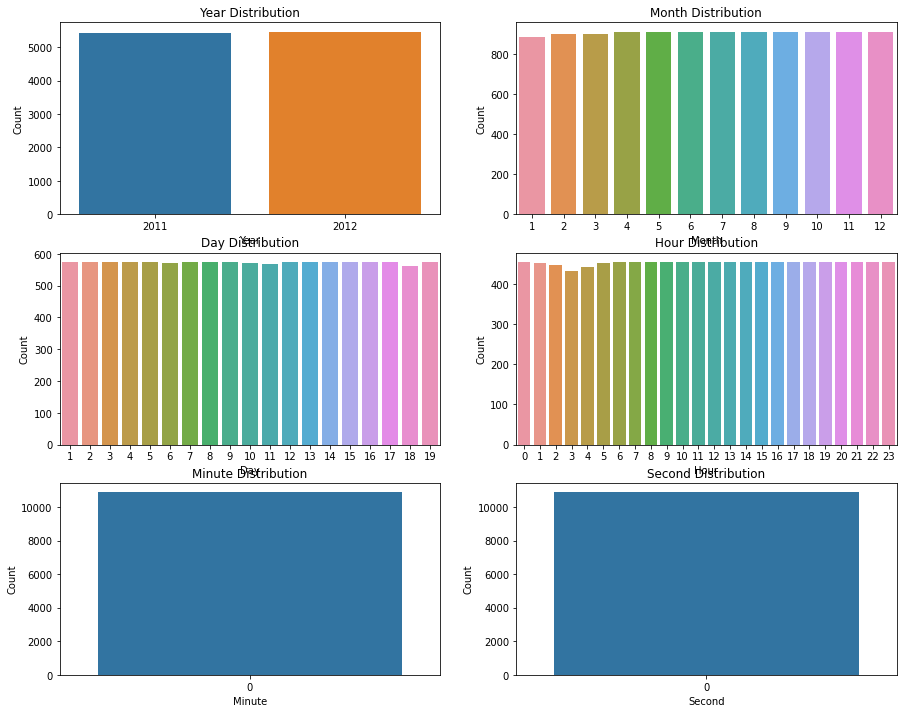

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12)) 

# 컬럼 이름 및 제목 설정
columns = ['year', 'month', 'day', 'hour', 'minute', 'second']
titles = ['Year Distribution', 'Month Distribution', 'Day Distribution', 
          'Hour Distribution', 'Minute Distribution', 'Second Distribution']

# 그래프 생성
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]  # 서브플롯 위치 계산
    sns.countplot(data=train, x=column, ax=ax)  # countplot 그리기
    ax.set_title(titles[i])  # 제목 설정
    ax.set_ylabel("Count")  # Y축 레이블
    ax.set_xlabel(column.capitalize())  # X축 레이블



In [40]:
# X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 
# 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. 
# ex) count를 예측하는데 casual,registered 컬럼이 필요할까요? count, registed가 필요하지 않아보임, 날짜도 변경하였으므로 삭제, minute, second도 삭제
# count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
X = train.drop(columns=['count', 'casual', 'registered', 'datetime','minute','second'])
y = train['count']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8708, 12)
X_test shape: (2178, 12)
y_train shape: (8708,)
y_test shape: (2178,)


In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)
print("예측값:", y_pred)

예측값: [248.10627003  48.79765547 200.90676727 ... 309.7528022   38.17030198
 243.62697388]


In [43]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(mse,rmse)

19945.370053754028 141.22807813517122


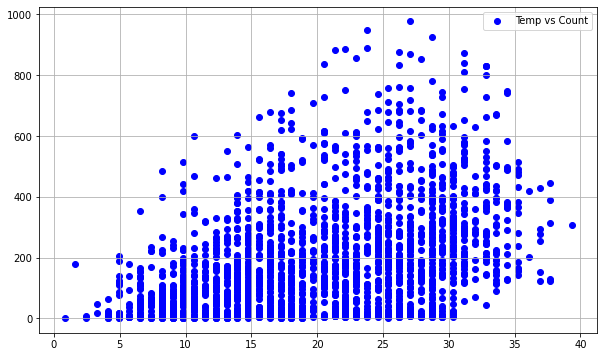

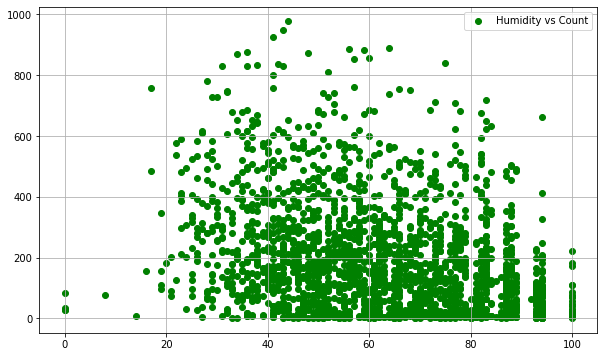

In [60]:
#x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
#x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기


# temp 데이터를 이용한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test['temp'], y_test, color="blue")
plt.legend()
plt.grid()
plt.show()

# humidity 데이터를 이용한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test['humidity'], y_test, color="green")
plt.legend()
plt.grid()
plt.show()

In [52]:
print(X.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')
